<div style="text-align: center;">

# **Simple Feedforward Neural Network**

</div>

# **Packages**

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from graphviz import Digraph
from IPython.display import display, Markdown

# **Introduction**

In this notebook, we explore one full forward pass of a simple feedforward neural network. The network architecture consists of:

- 2 input neurons
- 1 hidden layer with 3 neurons and ReLU activation
- 2 output neurons (no activation, suitable for regression)

We manually specify the weights, biases, and learning rate.

# **Neural Network Setup**

We consider a simple **feedforward neural network** with **2 input neurons**, **1 hidden layer with 3 neurons**, and **2 output neurons**. The following describes its structure:

- **Input vector**:  
  $$\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \in \mathbb{R}^2$$

- **Weight matrices and bias vectors**:

  Hidden layer weights:
  $$
  W^{(1)} =
  \begin{bmatrix}
  W^{(1)}_{11} & W^{(1)}_{12} \\
  W^{(1)}_{21} & W^{(1)}_{22} \\
  W^{(1)}_{31} & W^{(1)}_{32}
  \end{bmatrix} \in \mathbb{R}^{3 \times 2}, \quad
  \mathbf{b}^{(1)} =
  \begin{bmatrix}
  b^{(1)}_1 \\
  b^{(1)}_2 \\
  b^{(1)}_3
  \end{bmatrix} \in \mathbb{R}^3
  $$

  Output layer weights:
  $$
  W^{(2)} =
  \begin{bmatrix}
  W^{(2)}_{11} & W^{(2)}_{12} & W^{(2)}_{13} \\
  W^{(2)}_{21} & W^{(2)}_{22} & W^{(2)}_{23}
  \end{bmatrix} \in \mathbb{R}^{2 \times 3}, \quad
  \mathbf{b}^{(2)} =
  \begin{bmatrix}
  b^{(2)}_1 \\
  b^{(2)}_2
  \end{bmatrix} \in \mathbb{R}^2
  $$

### Forward Pass

1. **Hidden layer (before activation)**:  
   $$\mathbf{z}^{(1)} = W^{(1)} \mathbf{x} + \mathbf{b}^{(1)}$$

2. **Hidden layer activation (ReLU)**:  
   $$\mathbf{h} = \phi(\mathbf{z}^{(1)}) \quad \text{(applied elementwise)}$$

3. **Output layer**:  
   $$\mathbf{y} = W^{(2)} \mathbf{h} + \mathbf{b}^{(2)}$$

### Combined Expression

The full network can be written as:
$$
\mathbf{y} = W^{(2)} \cdot \phi(W^{(1)} \mathbf{x} + \mathbf{b}^{(1)}) + \mathbf{b}^{(2)}
$$

### Target Function

The target output vector is defined as:
$$
\mathbf{t} = f(x_1, x_2) = \begin{bmatrix}
x_1^2 + x_2^2 \\
x_1 \cdot x_2
\end{bmatrix}
$$

### Loss Function

We use the **mean squared error (MSE)** loss (with factor $ \frac{1}{2} $):
$$
\mathcal{L} = \frac{1}{2} \left\| \mathbf{y} - \mathbf{t} \right\|^2 = \frac{1}{2} \sum_{i=1}^2 (y_i - t_i)^2
$$

### Diagram

The network can be represented diagramatically by the following:

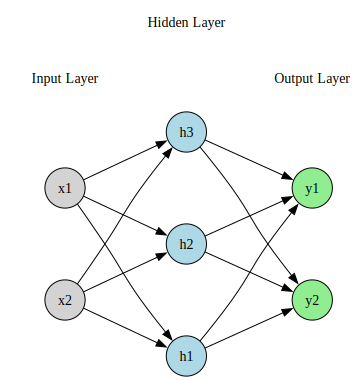

In [ ]:
def draw_neural_net():
    dot = Digraph(format='png')
    dot.attr(rankdir='LR', nodesep='1.0')

    # Input layer
    input_nodes = ['x1', 'x2']
    for node in input_nodes:
        dot.node(node, shape='circle', style='filled', fillcolor='lightgray')

    # Hidden layer
    hidden_nodes = ['h1', 'h2', 'h3']
    for node in hidden_nodes:
        dot.node(node, shape='circle', style='filled', fillcolor='lightblue')

    # Output layer
    output_nodes = ['y1', 'y2']
    for node in output_nodes:
        dot.node(node, shape='circle', style='filled', fillcolor='lightgreen')

    # Add a subgraph for each layer to group and rank nodes
    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('input_label', label='Input Layer', shape='plaintext')
        s.edge('input_label', 'x1', style='invis')
        s.edge('input_label', 'x2', style='invis')

    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('hidden_label', label='Hidden Layer', shape='plaintext')
        s.edge('hidden_label', 'h1', style='invis')
        s.edge('hidden_label', 'h2', style='invis')
        s.edge('hidden_label', 'h3', style='invis')

    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('output_label', label='Output Layer', shape='plaintext')
        s.edge('output_label', 'y1', style='invis')
        s.edge('output_label', 'y2', style='invis')

    # Connect input to hidden
    for i_node in input_nodes:
        for h_node in hidden_nodes:
            dot.edge(i_node, h_node)

    # Connect hidden to output
    for h_node in hidden_nodes:
        for o_node in output_nodes:
            dot.edge(h_node, o_node)

    return dot

# Display the diagram inline
display(draw_neural_net())

# **Running the Neural Network For One Iteration Using Pytorch**

We initialize the neural network with the following values:

The input vector $\mathbf{x} \in \mathbb{R}^2$ is:

$$
\mathbf{x} =
\begin{bmatrix}
1.0 \\
2.0
\end{bmatrix}
$$

The target vector $\mathbf{t} \in \mathbb{R}^2$ is:

$$
\mathbf{t} =
\begin{bmatrix}
5.0 \\
2.0
\end{bmatrix}
$$

Weight matrix $W^{(1)} \in \mathbb{R}^{3 \times 2}$:

$$
W^{(1)} =
\begin{bmatrix}
0.1 & -0.2 \\
0.4 & \phantom{-}0.1 \\
-0.3 & \phantom{-}0.2
\end{bmatrix}
$$

Bias vector $\mathbf{b}^{(1)} \in \mathbb{R}^3$:

$$
\mathbf{b}^{(1)} =
\begin{bmatrix}
0.0 \\
0.0 \\
0.0
\end{bmatrix}
$$

Weight matrix $W^{(2)} \in \mathbb{R}^{2 \times 3}$:

$$
W^{(2)} =
\begin{bmatrix}
0.2 & -0.1 & \phantom{-}0.3 \\
-0.3 & \phantom{-}0.5 & \phantom{-}0.1
\end{bmatrix}
$$

Bias vector $\mathbf{b}^{(2)} \in \mathbb{R}^2$:

$$
\mathbf{b}^{(2)} =
\begin{bmatrix}
0.0 \\
0.0
\end{bmatrix}
$$

In [4]:
# Define the updated neural network class for the (2 -> 3 -> 2) architecture
class TwoLayerNN(nn.Module):
    def __init__(self):
        super(TwoLayerNN, self).__init__()
        # Manually define parameters so we can initialize them explicitly
        self.W1 = nn.Parameter(torch.tensor([[0.1, -0.2],
                                             [0.4, 0.1],
                                             [-0.3, 0.2]], dtype=torch.float32))  # (3, 2)
        self.b1 = nn.Parameter(torch.zeros(3, dtype=torch.float32))  # (3,)
        self.W2 = nn.Parameter(torch.tensor([[0.2, -0.1, 0.3],
                                             [-0.3, 0.5, 0.1]], dtype=torch.float32))  # (2, 3)
        self.b2 = nn.Parameter(torch.zeros(2, dtype=torch.float32))  # (2,)

    def forward(self, x):
        z1 = self.W1 @ x + self.b1.unsqueeze(1)       # (3,1)
        h = torch.relu(z1)                            # (3,1)
        z2 = self.W2 @ h + self.b2.unsqueeze(1)       # (2,1)
        return z2, h, z1  # output, hidden activation, hidden pre-activation

In [5]:
# Initialize model
model = TwoLayerNN()

In [6]:
# Input and target
x = torch.tensor([[1.0], [2.0]])  # shape (2,1)
t = torch.tensor([[5.0], [2.0]])  # target output

We use a learning rate of:

$$
\eta = 0.01
$$

In [20]:
# Learning rate
eta = 0.01

We run the neural network using the innitial weights and input vector and calculate the loss:

In [8]:
# Forward pass
y, h, z1 = model(x)
loss = 0.5 * torch.sum((y - t) ** 2)

We then compute the backpropagation equations:

**Backpropagate to Output Layer**

$$
\delta^{(2)} = \frac{\partial \mathcal{L}}{\partial \mathbf{y}} = \mathbf{y} - \mathbf{t}
$$

**Gradients for Output Layer Parameters**

Weights:

$$
\frac{\partial \mathcal{L}}{\partial W^{(2)}} =
\left( \frac{\partial \mathcal{L}}{\partial \mathbf{y}} \right) \cdot \left( \frac{\partial \mathbf{y}}{\partial W^{(2)}} \right) =
(\mathbf{y} - \mathbf{t}) \cdot \mathbf{h}^\top
$$

Biases:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(2)}} =
\left( \frac{\partial \mathcal{L}}{\partial \mathbf{y}} \right) \cdot \left( \frac{\partial \mathbf{y}}{\partial \mathbf{b}^{(2)}} \right) =
\mathbf{y} - \mathbf{t}
$$

**Backpropagate to Hidden Layer**

Gradient w.r.t. hidden activations:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{h}} =
\left( \frac{\partial \mathcal{L}}{\partial \mathbf{y}} \right) \cdot \left( \frac{\partial \mathbf{y}}{\partial \mathbf{h}} \right)
= (W^{(2)})^\top (\mathbf{y} - \mathbf{t})
$$

Define hidden layer error:

$$
\delta^{(1)} =
\left( \frac{\partial \mathcal{L}}{\partial \mathbf{z}^{(1)}} \right) =
\left( \frac{\partial \mathcal{L}}{\partial \mathbf{h}} \right) \odot \left( \frac{\partial \mathbf{h}}{\partial \mathbf{z}^{(1)}} \right) =
\left( \frac{\partial \mathcal{L}}{\partial \mathbf{h}} \right) \odot \phi'(\mathbf{z}^{(1)}) =
(W^{(2)})^\top (\mathbf{y} - \mathbf{t}) \odot \phi'(\mathbf{z}^{(1)})
$$

**Gradients for Hidden Layer Parameters**

Weights:

$$
\frac{\partial \mathcal{L}}{\partial W^{(1)}} =
\left( \frac{\partial \mathcal{L}}{\partial \mathbf{z}^{(1)}} \right) \cdot \left( \frac{\partial \mathbf{z}^{(1)}}{\partial W^{(1)}} \right) =
\delta^{(1)} \cdot \mathbf{x}^\top
$$

Biases:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(1)}} =
\left( \frac{\partial \mathcal{L}}{\partial \mathbf{z}^{(1)}} \right) =
\delta^{(1)}
$$

In [9]:
# Backward pass
loss.backward()

After computing the gradients of the loss function with respect to all parameters, we update the weights and biases using **gradient descent**:

**Output layer weights and biases:**

$$
W^{(2)} \leftarrow W^{(2)} - \eta \cdot \frac{\partial \mathcal{L}}{\partial W^{(2)}}
$$

$$
\mathbf{b}^{(2)} \leftarrow \mathbf{b}^{(2)} - \eta \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(2)}}
$$

**Hidden layer weights and biases:**

$$
W^{(1)} \leftarrow W^{(1)} - \eta \cdot \frac{\partial \mathcal{L}}{\partial W^{(1)}}
$$

$$
\mathbf{b}^{(1)} \leftarrow \mathbf{b}^{(1)} - \eta \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(1)}}
$$

In [10]:
# Manually update weights and biases using gradients
with torch.no_grad():
    model.W1 -= eta * model.W1.grad
    model.b1 -= eta * model.b1.grad
    model.W2 -= eta * model.W2.grad
    model.b2 -= eta * model.b2.grad

In [11]:
# Prepare to display updated weights and biases
updated_params = {
    "W1": model.W1.detach().numpy(),
    "b1": model.b1.detach().numpy(),
    "W2": model.W2.detach().numpy(),
    "b2": model.b2.detach().numpy(),
    "output y": y.detach().numpy().flatten(),
    "loss": loss.item()
}

In [17]:
W1_df = pd.DataFrame(updated_params["W1"], columns=["x1", "x2"], index=["h1", "h2", "h3"])
W2_df = pd.DataFrame(updated_params["W2"], columns=["h1", "h2", "h3"], index=["y1", "y2"])
b1_df = pd.DataFrame(updated_params["b1"], index=["h1", "h2", "h3"], columns=["b1"])
b2_df = pd.DataFrame(updated_params["b2"], index=["y1", "y2"], columns=["b2"])

The updated weights and biases are:

In [23]:
# Display all updated parameters nicely
display(Markdown("### Updated Parameters"))

display(Markdown("**Hidden Layer Weights (W1):**"))
display(W1_df)

display(Markdown("**Hidden Layer Biases (b1):**"))
display(b1_df)

display(Markdown("**Output Layer Weights (W2):**"))
display(W2_df)

display(Markdown("**Output Layer Biases (b2):**"))
display(b2_df)

### Updated Parameters

**Hidden Layer Weights (W1):**

,x1,x2
h1,0.10000,-0.20000
h2,0.40342,0.10684
h3,-0.28322,0.23356


**Hidden Layer Biases (b1):**

,b1
h1,0.00000
h2,0.00342
h3,0.01678


**Output Layer Weights (W2):**

,h1,h2,h3
y1,0.2,-0.06982,0.30503
y2,-0.3,0.51014,0.10169


**Output Layer Biases (b2):**

,b2
y1,0.0503
y2,0.0169
